**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

Beginning of the semester, I enrolled in CS746 a data science-related course. one can teach coding in different languages like R, Python, etc., However, If a professor asks students what is your <b>preferred programming language</b> and professor sends out a form with a question like <b> What is your University Major, Number of courses taken in a semester, Number work experience in a programming language, What is your undergraduate GPA</b> with this professor can do multiclass classification and decide which medium of programming to be taught in that semester.

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df =pd.read_csv('auto_imports1.csv') #imports the dataset
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info() #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

In [4]:
df = df.replace(['?'],'NaN') #replaces '?' with 'NaN'

In [5]:
float_values = {'bore':float,'stroke':float,'horse_power':float,'peak_rpm':float} #assign float values

In [6]:
df = df.astype(float_values) #typecasting to float64

In [7]:
df.info() #summary of dataset after converting some variables from object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [8]:
df.shape #shape of the data set

(201, 18)

In [9]:
df2 = df #creates new dataset

In [10]:
df2.head() #snapshot of new dataset df2

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [11]:
df2 = df2.drop(['body','engine_type','cylinders'], axis=1) #drops 3 variables

In [12]:
df2.isnull().sum() #checks null values

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           4
stroke         4
comprassion    0
horse_power    2
peak_rpm       2
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [13]:
df2 = df2.dropna() #drops null values

In [14]:
df2 = pd.get_dummies(df2, columns = ['fuel_type'], drop_first = True) #creates dummies for fuel_type

In [15]:
df2.info() #summary of dataset after dummy variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


In [16]:
df2.shape #old shape

(195, 15)

In [17]:
df2 = df2.drop_duplicates() #drop duplicate values

In [18]:
df2.describe().T #summary statistics

,count,mean,std,min,25%,50%,75%,max
wheel_base,192.0,98.964062,6.153849,86.60,94.5000,97.20,102.40,120.90
length,192.0,174.443229,12.451618,141.10,166.6750,173.20,184.60,208.10
width,192.0,65.910417,2.138110,60.30,64.1000,65.50,66.90,72.00
heights,192.0,53.906250,2.387722,47.80,52.0000,54.10,55.70,59.80
curb_weight,192.0,2565.140625,526.002275,1488.00,2163.0000,2422.50,2952.50,4066.00
engine_size,192.0,128.385417,41.588704,61.00,98.0000,120.00,146.00,326.00
bore,192.0,3.333646,0.271616,2.54,3.1500,3.31,3.59,3.94
stroke,192.0,3.248594,0.316038,2.07,3.1075,3.29,3.41,4.17
comprassion,192.0,10.226667,4.084397,7.00,8.5750,9.00,9.40,23.00
horse_power,192.0,103.395833,38.069096,48.00,70.0000,95.00,116.00,262.00


### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

<h3> Univariate feature selection. </h3>

In univariate I am choosing SeleckKBest feature selection, it removes all but highest <b> K</b> scoring features.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectPercentile, chi2

In [20]:
traget = 'price' #dependent varible

In [21]:
x = df2.loc[:,df2.columns != traget] #Dataset without dependent variable

In [22]:
y = df2.loc[:,traget] #Dataset without independent variables

In [23]:
print('Feature data dimension:', x.shape) #dimension of data without target variable

Feature data dimension: (192, 14)


Now we have 14 variables.

In [24]:
select = SelectKBest(score_func=chi2, k=6) #ScoreFunction is ChiSquare, & K=6

In [25]:
z = select.fit_transform(x,y) #Fits the model

In [26]:
print("After selecting best 6 features:", z.shape)  #returns best high K scoring variables

After selecting best 6 features: (192, 6)


In [27]:
array = x.columns #assigning variable names to array

In [28]:
filter = select.get_support() #filter method

In [29]:
features = np.asarray(array) #convert list string to array

In [30]:
print("All features:") #prints all feature before K Selection.
print(features)

All features:
['wheel_base' 'length' 'width' 'heights' 'curb_weight' 'engine_size'
 'bore' 'stroke' 'comprassion' 'horse_power' 'peak_rpm' 'city_mpg'
 'highway_mpg' 'fuel_type_gas']


In [31]:
print("Selected best 6:")
print(features[filter]) #prints 6 best features

Selected best 6:
['curb_weight' 'engine_size' 'comprassion' 'horse_power' 'peak_rpm'
 'city_mpg']


According to Fliter Methods <b> Curb Weight, Engine Size, Comprassion, Horse Power, Peak RPM, City MPG </b> are high <b>K</b> scoring features. As we know Fliter Methods just a sneakpeek to add or removal of irrelevant features without using any machine learning algorithms. So, Lets' check with others methods too.

### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [33]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=6,
          forward=True,
          floating=False, 
          scoring = 'r2', 
          cv = 0)
sfs.fit(x, y) 
sfs.k_feature_names_ # to get the final set of features

('width', 'engine_size', 'stroke', 'horse_power', 'peak_rpm', 'fuel_type_gas')

In [34]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
          k_features=6,
          forward=False,
          floating=False,
          cv=0)
sbs.fit(x, y)
sbs.k_feature_names_

('width', 'engine_size', 'stroke', 'horse_power', 'peak_rpm', 'fuel_type_gas')

As per both sequential forward selection and backward elimination <b> width, engine_size, stroke, horse_power, peak_rpm, fuel_type_gas </b> are significant features.

Here we are directly using the optimal value of k_features argument in both forward selection and backward elimination. In order to find out the optimal number of significant features, we can use the hit and trial method for different values of k_features and make the final decision by plotting it against the model performance

In [35]:
sfs1 = SFS(LinearRegression(),
           k_features=(1,14),
           forward=True,
           floating=False,
           cv=0)
sfs1.fit(x, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(1, 14))

/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


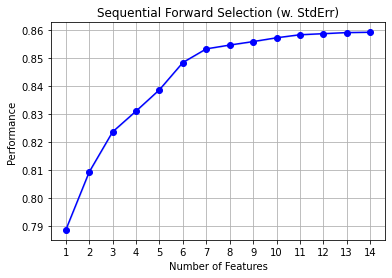

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs 
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

According to the graph performance is increasing with increase in variables. when it has 1 feature it has lowest performance whereas when it has 14 features it has highest performance.

### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [38]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.25)
print("Train data shape of X = {}and Y = {} : ".format( x_train.shape, y_train.shape))
print("Test data shape of X = {} and Y = {} : ".format( x_test.shape, y_test.shape))

Train data shape of X = (144, 14)and Y = (144,) : 
Test data shape of X = (48, 14) and Y = (48,) : 


In [39]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     58.41
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           8.48e-49
Time:                        19:47:01   Log-Likelihood:                -1359.7
No. Observations:                 144   AIC:                             2749.
Df Residuals:                     129   BIC:                             2794.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.985e+04   2.34e+04     -1.701

/Users/nithinreddynagapur/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

9109482.145508042
          Columns  Coefficient Estimate
0      wheel_base             54.427993
1          length            -72.376488
2           width            716.017359
3         heights            266.327193
4     curb_weight              1.814793
5     engine_size            121.036547
6            bore           -287.904715
7          stroke          -2441.191949
8     comprassion             12.211609
9     horse_power             29.990991
10       peak_rpm              1.899293
11       city_mpg           -199.612011
12    highway_mpg            198.087748
13  fuel_type_gas          -2892.662962


From the above method Width, Engine Size, Storke, Horse Power, Peak RPM are siginificant features with a confidence interval of 95% and alpha value is 5%.

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

From all the three methods they have small differences selecting the best sigificant features.
1. Filter Method : Curb Weight, Engine Size, Comprassion, Horse Power, Peak RPM, City MPG.
2. Wrapper Method : Width, Engine Size, Stroke, Horse power, peak rpm, fuel_type_gas.
3. Embedded Method : Width, Engine Size, Stroke, Horse power, peak rpm.

We can see that Width, Engine Size, Stroke, Horse power, peak rpm are siginificant features. However, choosing a significant feature depends upon domain knowledge and expertise.

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

1. PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables.
2. PCA can be used when the dimensions of the input features are high (e.g. a lot of variables).
3. PCA can be also used for denoising and data compression.

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.6885625 , -0.45439741, -0.84895065, ..., -0.67997353,
        -0.55699827,  0.34099717],
       [-1.6885625 , -0.45439741, -0.84895065, ..., -0.67997353,
        -0.55699827,  0.34099717],
       [-0.72730636, -0.26114745, -0.19245487, ..., -0.99156045,
        -0.70309618,  0.34099717],
       ...,
       [ 1.65139529,  1.15601887,  1.40189204, ..., -1.14735391,
        -1.1413899 ,  0.34099717],
       [ 1.65139529,  1.15601887,  1.40189204, ...,  0.09899376,
        -0.55699827, -2.93257566],
       [ 1.65139529,  1.15601887,  1.40189204, ..., -0.99156045,
        -0.84919409,  0.34099717]])

In [64]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(x)
X_pca.shape

(192, 6)

In [65]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LinearRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.7838996260465899

After doing PCA with regression we got a model score of 78% which is not a bad score actually.

## Reference

1. CS746 Feature Selection Pdf
3. Youtube (Related methods)